## BTC の ローソク足チャート

matplotlib.finance ではローソク足チャートを描画できる。

以下の例では、[Yahoo! Finance から取得したビットコイン-USD 交換レートデータ](https://finance.yahoo.com/quote/BTC-USD/history/)の毎日の始値をプロットしている:

/Users/ikob/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(736634.0, 736814.0)

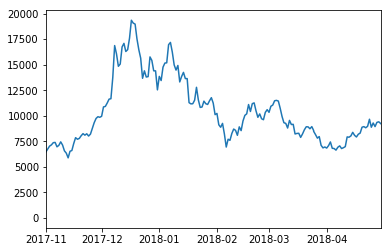

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.finance as mpf
from matplotlib.dates import date2num

import pandas as pd
from datetime import datetime

fig, ax = plt.subplots(1,1)

df = pd.read_csv("BTC-USD.csv", index_col = 0, parse_dates=True)
ax.plot(df["Open"])
#ax.plot(df["Close"])

ax.set_xlim(["2017/11/1", "2018/4/30"])

以下の例では、ローソク足チャートを描画している。`ohlc` は `[日付,始値,高値,低値,終値]` を要素に持つリスト:

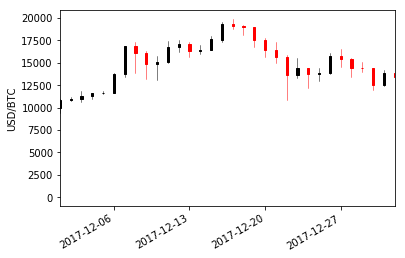

In [2]:
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
from matplotlib.dates import date2num

import pandas as pd
from datetime import datetime

fig = plt.figure()
ax = plt.subplot(1,1, 1)


df = pd.read_csv("BTC-USD.csv", index_col = 0, parse_dates=True)
ohlc = [(date2num(x.date()), val["Open"], val["High"], val["Low"], val["Close"]) for x, val in df.iterrows()]
mpf.candlestick_ohlc(ax, ohlc)

ax.set_xlim(df.index[0], df.index[-1])
ax.set_xlim(["2017/12/1", "2018/1/1"])
fig.autofmt_xdate()
ax.set_ylabel("USD/BTC")
plt.show()

以下の例では、さらに相場に影響を与えたイベントを注釈として加えている:

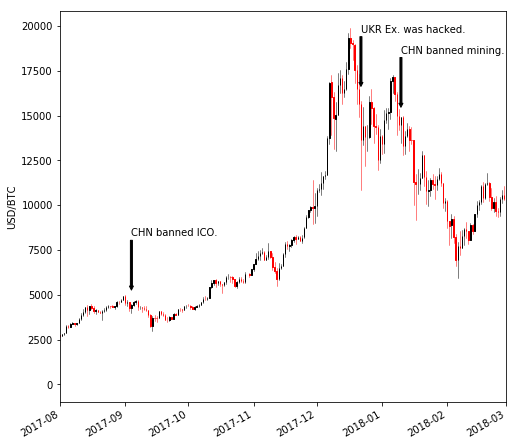

In [3]:
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
from matplotlib.dates import date2num

import pandas as pd
from datetime import datetime

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(1,1, 1)


df = pd.read_csv("BTC-USD.csv", index_col = 0, parse_dates=True)
ohlc = [(date2num(x.date()), val["Open"], val["High"], val["Low"], val["Close"]) for x, val in df.iterrows()]
mpf.candlestick_ohlc(ax, ohlc)

btc_topics = [
    (datetime(2017,9,4), "CHN banned ICO."),
    (datetime(2017,12,22), "UKR Ex. was hacked."),
    (datetime(2018,1,10), "CHN banned mining."),
]

ax.set_xlim(df.index[0], df.index[-1])
ax.set_xlim(["2017/8/1", "2018/3/1"])
fig.autofmt_xdate()
for date, label in btc_topics:
    ax.annotate(label, xy =(date, df["Open"].asof(date) + 1000),
    xytext = (date, df["Open"].asof(date) + 4000),
    arrowprops=dict(facecolor="black", headwidth=4, width = 2, headlength=4),
               horizontalalignment="left")
ax.set_ylabel("USD/BTC")
plt.show()